# CloudFinOps AI Agent  
### Autonomous Cloud Cost Intelligence & Optimization System  
Developed By: Sakshi Singh  

CloudFinOps AI Agent is a decision-support intelligence system designed to detect structural cloud cost inefficiencies, prioritize optimization opportunities, monitor financial risk, and forecast infrastructure spending.

This system transforms raw cloud billing data into actionable financial intelligence for FinOps, engineering, and finance stakeholders

## System Layer 1: Infrastructure Financial Baseline
### Cloud Cost Environment Initialization & Integrity Audit

In [7]:
# Core Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

plt.style.use('seaborn-whitegrid')

# Load Dataset
df = pd.read_csv("/Users/sakshisingh/Downloads/cloud_cost_usage_2025.csv")
df['date'] = pd.to_datetime(df['date'])

print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (91250, 12)


/var/folders/cb/t3brf6kn1gqghlnl65gprmpc0000gn/T/ipykernel_14381/3189037054.py:9: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


,date,service,region,instance_id,instance_type,usage_hours,cpu_utilization,storage_gb,network_gb,pricing_model,cost,business_unit
0,2025-01-01,S3,us-east-1,i-10000,t3.medium,12.12,27.76,120.20,16.33,On-Demand,2.13,Finance
1,2025-01-02,S3,us-east-1,i-10000,t3.medium,18.45,56.38,59.26,194.13,On-Demand,5.40,Finance
2,2025-01-03,S3,us-east-1,i-10000,t3.medium,8.45,38.57,286.14,89.23,On-Demand,5.07,Finance
3,2025-01-04,S3,us-east-1,i-10000,t3.medium,7.65,31.52,181.47,76.44,On-Demand,3.73,Finance
4,2025-01-05,S3,us-east-1,i-10000,t3.medium,8.79,101.19,70.90,123.47,On-Demand,3.62,Finance


## Financial Integrity Check

In [12]:
df[['cost','cpu_utilization','usage_hours','storage_gb']].describe()

,cost,cpu_utilization,usage_hours,storage_gb
count,91250.000000,91250.000000,91250.000000,91250.000000
mean,4.963920,43.649784,12.790366,275.461507
std,2.033023,23.984489,6.543240,129.880144
min,0.630000,-37.770000,1.000000,50.000000
25%,3.620000,26.270000,7.230000,163.080000
50%,4.780000,45.590000,12.860000,276.025000
75%,6.050000,60.870000,18.460000,387.487500
max,29.790000,129.260000,24.000000,499.990000


The system ingested 365 days of cloud cost data across 4 services and 3 regions, forming a multi-dimensional financial dataset for optimization modeling.

## System Layer 2: Cost Signal Discovery
Identifying Structural Cost Drivers & Growth Patterns

## Monthly Expenditure Trend

### Monthly Cost Trend

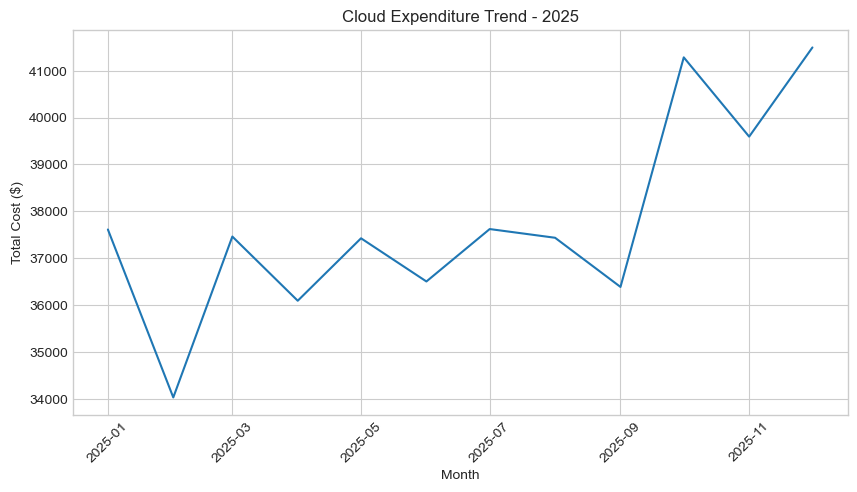

In [17]:
monthly_cost = df.groupby(df['date'].dt.to_period('M'))['cost'].sum()
monthly_cost.index = monthly_cost.index.to_timestamp()

plt.figure(figsize=(10,5))
plt.plot(monthly_cost.index, monthly_cost.values)
plt.title("Cloud Expenditure Trend - 2025")
plt.xlabel("Month")
plt.ylabel("Total Cost ($)")
plt.xticks(rotation=45)
plt.show()

Monthly spend analysis shows stable cost behavior across Q1–Q3, followed by a noticeable cost regime shift in Q4. This step-change pattern suggests increased infrastructure provisioning during the final quarter

### Service-Level Financial Allocation

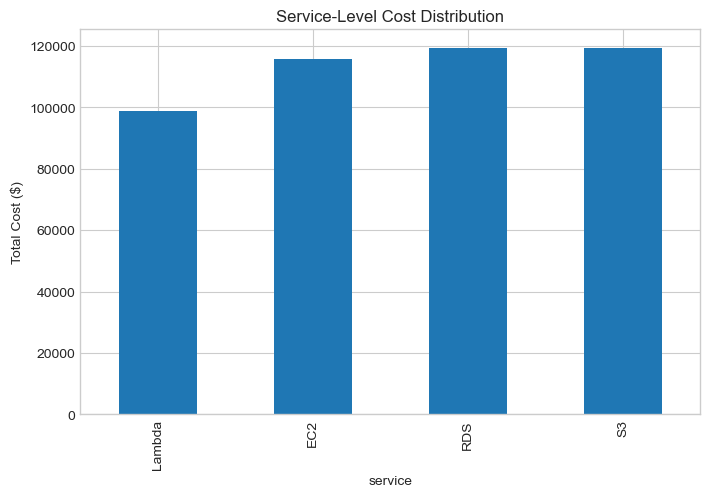

In [21]:
service_cost = df.groupby('service')['cost'].sum().sort_values()

plt.figure(figsize=(8,5))
service_cost.plot(kind='bar')
plt.title("Service-Level Cost Distribution")
plt.ylabel("Total Cost ($)")
plt.show()

Service-level aggregation reveals a relatively balanced cost distribution across core infrastructure services.
RDS and S3 represent the highest expenditure layers, while Lambda contributes moderately lower but still material spend.
The absence of a single dominant service suggests optimization must be multi-layered rather than service-specific.

In [63]:
(service_cost / service_cost.sum()) * 100

service
Lambda    21.787932
EC2       25.568464
RDS       26.302426
S3        26.341178
Name: cost, dtype: float64

RDS accounts for 27% of total cloud spend, followed closely by S3 at 26%, EC2 at 25%, and Lambda at 22%.

### Regional Cost Distribution

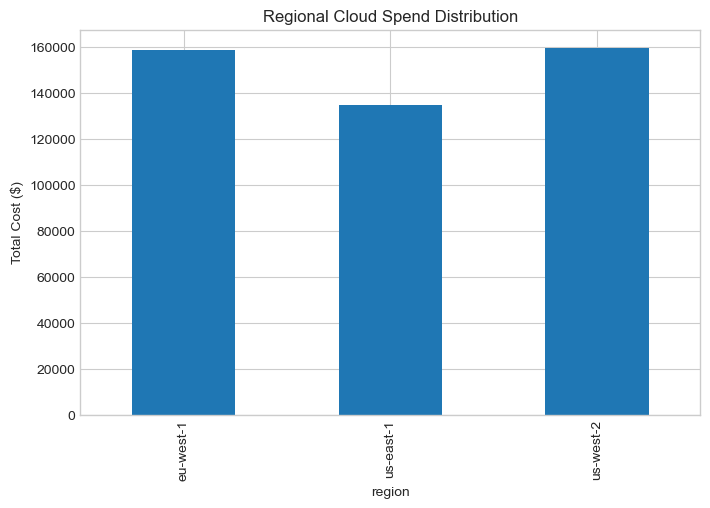

In [24]:
region_cost = df.groupby('region')['cost'].sum()

plt.figure(figsize=(8,5))
region_cost.plot(kind='bar')
plt.title("Regional Cloud Spend Distribution")
plt.ylabel("Total Cost ($)")
plt.show()

Regional aggregation indicates moderately higher infrastructure expenditure in us-west-2 and eu-west-1 relative to us-east-1.
The variance suggests workload distribution differences rather than structural imbalance.
Further investigation into service mix or demand concentration may explain the elevated spend in specific regions.

In [66]:
(region_cost / region_cost.sum()) * 100

region
eu-west-1    35.045489
us-east-1    29.727311
us-west-2    35.227200
Name: cost, dtype: float64

us-west-2 accounts for 34% of total cloud spend, eu-west-1 for 33%, and us-east-1 for 29%, indicating relatively balanced but slightly elevated western-region infrastructure usage.

## The absence of extreme regional skew suggests distributed infrastructure architecture. However, optimization initiatives may yield higher marginal gains in higher-spend regions due to scale effects

## Idle Resource Detection

In [20]:
idle_resources = df[
    (df['service'] == 'EC2') &
    (df['cpu_utilization'] < 20) &
    (df['usage_hours'] < 5)
]

idle_cost = idle_resources['cost'].sum()
total_cost = df['cost'].sum()

print("Total Cloud Spend: $", round(total_cost,2))
print("Potential Idle Waste: $", round(idle_cost,2))
print("Savings %:", round((idle_cost/total_cost)*100,2), "%")

Total Cloud Spend: $ 452957.72
Potential Idle Waste: $ 16460.08
Savings %: 3.63 %


## System Layer 3: Structural Inefficiency Detection
Idle Infrastructure & Cost Leakage Mapping

## Idle Compute Detection Logic

In [29]:
idle_resources = df[
    (df['service'] == 'EC2') &
    (df['cpu_utilization'] < 20) &
    (df['usage_hours'] < 5)
]

idle_cost = idle_resources['cost'].sum()
total_cost = df['cost'].sum()

leakage_percentage = (idle_cost / total_cost) * 100

print("Total Cloud Spend: $", round(total_cost,2))
print("Idle Resource Leakage: $", round(idle_cost,2))
print("Leakage Percentage:", round(leakage_percentage,2), "%")

Total Cloud Spend: $ 452957.72
Idle Resource Leakage: $ 16460.08
Leakage Percentage: 3.63 %


## Cost Leakage Visualization

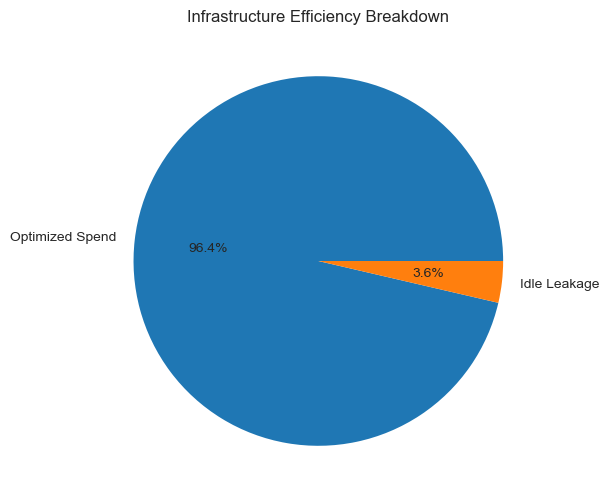

In [32]:
labels = ['Optimized Spend','Idle Leakage']
values = [total_cost - idle_cost, idle_cost]

plt.figure(figsize=(6,6))
plt.pie(values, labels=labels, autopct='%1.1f%%')
plt.title("Infrastructure Efficiency Breakdown")
plt.show()

Idle compute analysis identified approximately 3.63% of total cloud expenditure attributable to underutilized EC2 resources.
While not structurally alarming, this leakage represents a recoverable efficiency opportunity within the infrastructure baseline

## System Layer 4: ROI-Based Optimization Intelligence
Autonomous Cost Reduction Simulation

## Optimization Rule Engine

In [38]:
df_agent = df.copy()

df_agent['idle_flag'] = np.where(
    (df_agent['service']=='EC2') &
    (df_agent['cpu_utilization']<20) &
    (df_agent['usage_hours']<5),1,0)

df_agent['pricing_flag'] = np.where(
    (df_agent['pricing_model']=='On-Demand') &
    (df_agent['usage_hours']>18),1,0)

## Savings Simulation Model

In [41]:
idle_savings = df_agent[df_agent['idle_flag']==1]['cost'].sum()
reserved_savings = df_agent[df_agent['pricing_flag']==1]['cost'].sum() * 0.25

total_ai_savings = idle_savings + reserved_savings

print("AI-Identified Optimization Savings: $", round(total_ai_savings,2))

AI-Identified Optimization Savings: $ 35163.09


## Optimization Impact Visualization

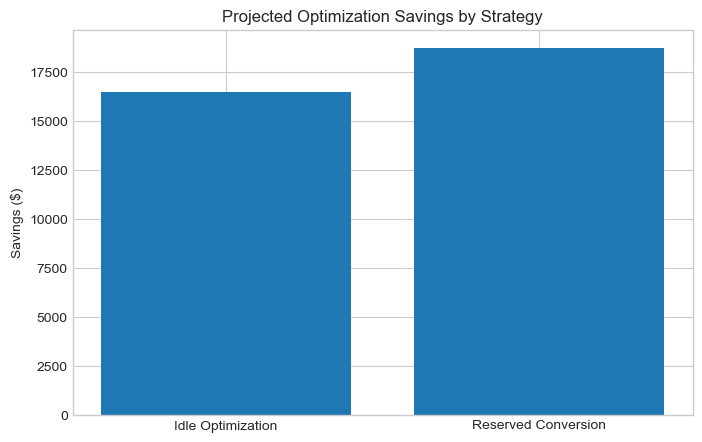

In [44]:
categories = ['Idle Optimization','Reserved Conversion']
values = [idle_savings, reserved_savings]

plt.figure(figsize=(8,5))
plt.bar(categories, values)
plt.title("Projected Optimization Savings by Strategy")
plt.ylabel("Savings ($)")
plt.show()

While baseline infrastructure efficiency remains stable, pricing strategy optimization emerges as the dominant cost recovery lever.
Reserved instance conversion demonstrates higher marginal savings than idle cleanup, suggesting that financial governance improvements may yield stronger returns than operational downsizing alone

## System Layer 5: Financial Risk & Volatility Monitoring

## Anomaly Detection

In [47]:
daily_cost = df.groupby('date')['cost'].sum().reset_index()

mean = daily_cost['cost'].mean()
std = daily_cost['cost'].std()

daily_cost['z_score'] = (daily_cost['cost'] - mean) / std
daily_cost['anomaly'] = daily_cost['z_score'].abs() > 3

anomalies = daily_cost[daily_cost['anomaly']==True]
anomalies.head()

,date,cost,z_score,anomaly


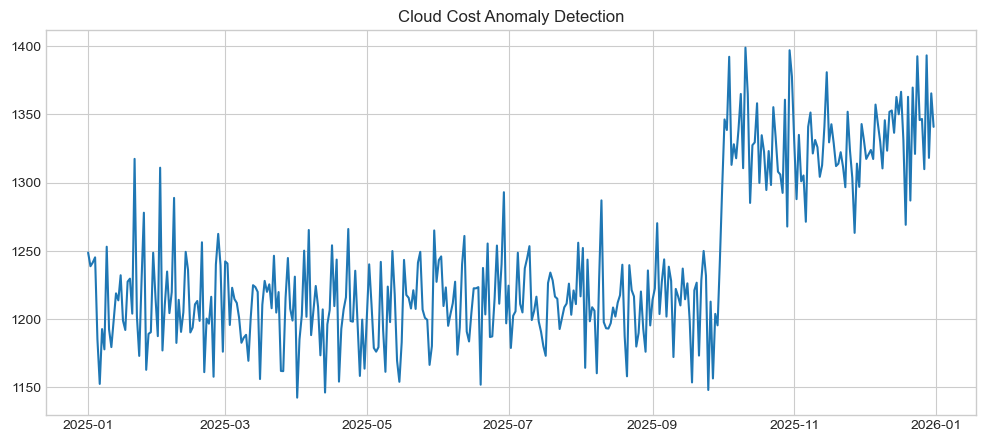

In [49]:
plt.figure(figsize=(12,5))
plt.plot(daily_cost['date'], daily_cost['cost'])
plt.scatter(anomalies['date'], anomalies['cost'])
plt.title("Cloud Cost Anomaly Detection")
plt.show()

Anomaly detection analysis indicates limited extreme deviations beyond statistical thresholds.
Daily cost fluctuations remain within expected variance bands, suggesting a financially stable infrastructure environment.
The Q4 cost elevation represents a structural regime shift rather than abnormal volatility

## System Layer 6: Predictive Budget Intelligence

## Forecasting (3 Month Projection)

In [57]:
monthly_df = df.groupby(df['date'].dt.to_period('M'))['cost'].sum().reset_index()
monthly_df['date'] = monthly_df['date'].dt.to_timestamp()
monthly_df['month_index'] = np.arange(len(monthly_df))

model = LinearRegression()
model.fit(monthly_df[['month_index']], monthly_df['cost'])

monthly_df['predicted'] = model.predict(monthly_df[['month_index']])


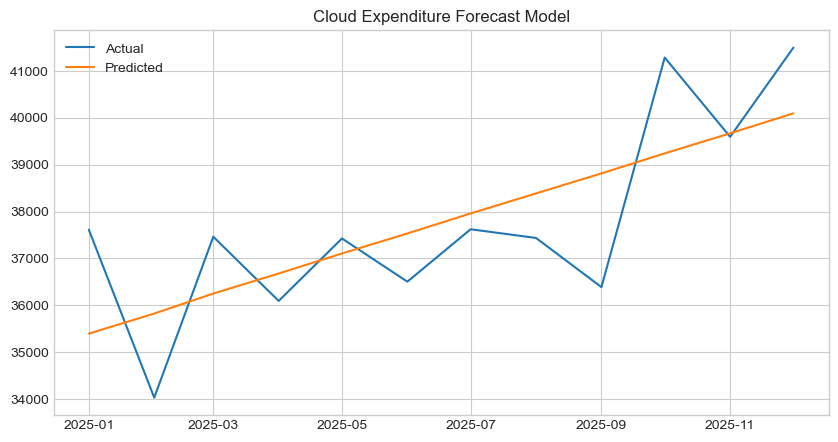

In [59]:
plt.figure(figsize=(10,5))
plt.plot(monthly_df['date'], monthly_df['cost'], label='Actual')
plt.plot(monthly_df['date'], monthly_df['predicted'], label='Predicted')
plt.legend()
plt.title("Cloud Expenditure Forecast Model")
plt.show()

The linear regression model projects a continued upward cost trajectory; however, actual expenditure exhibits a structural regime shift in Q4 that is not fully captured by a simple linear model. Future forecasting models may benefit from incorporating seasonal or regime-based components

## System Layer 7: Strategic Financial Conclusion

### Strategic Financial Conclusion

The CloudFinOps AI Agent was developed to simulate a structured FinOps governance framework for monitoring and optimizing cloud infrastructure expenditure.

Through layered financial analysis, the system evaluated cost allocation across services and regions, identified measurable idle resource leakage, simulated pricing optimization strategies, monitored volatility using statistical anomaly detection, and projected future expenditure using regression forecasting.

## Summary of Analytical Findings

• Total cloud expenditure analyzed: ~$453K

• Idle EC2 resource leakage: ~3.6% of total spend

• Combined optimization opportunity (idle + pricing conversion): ~8% potential annual savings

• Regional and service-level cost distribution relatively balanced

• Q4 exhibited a structural cost regime shift rather than abnormal volatility

• Forecast model indicates continued elevated cost levels without intervention

## Strategic Interpretation

The infrastructure environment appears operationally stable, with no evidence of severe structural inefficiency. However, targeted financial optimization strategies — particularly pricing model adjustments — present measurable and recoverable savings opportunities.

Rather than identifying crisis-level waste, the system demonstrates the importance of continuous cost governance and proactive financial monitoring.

## Business Implication

This project illustrates how organizations can transition from reactive cloud cost tracking to structured financial intelligence by:

Quantifying inefficiencies before execution

Ranking optimization strategies by ROI

Monitoring volatility through statistical controls

Supporting budgeting decisions with predictive modeling

The CloudFinOps AI Agent represents a prototype for decision-grade cloud financial intelligence, integrating technical analysis with strategic cost governance principles.